# Punto 1


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import brownian_motion as bm 
from scipy.stats import jarque_bera
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime



In [40]:
#Función de plot:
def plotear(nombre_proceso,time, mu_teor_t,mu_hat_t, var_teor_t,var_hat_t,mu_error,var_error,lim_err=[0,1]):
    """
    Plotear comparaciones de vector de medias y varianzas teóricas y empíricas
    """
    fig = plt.figure(figsize=(15, 7))
    # paths
    title = f"Comparación media teórica y empírica {nombre_proceso}"
    plt.subplot(2, 2, 1)
    plt.plot(time, np.array([mu_teor_t,mu_hat_t]).T)
    plt.legend(["media teórica","media empírica"])
    plt.gca().set_title(title, fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    #correlation
    title = f"Comparación varianza teórica y empírica {nombre_proceso}"
    plt.subplot(2, 2, 2)
    # sns.heatmap(np.corrcoef(corr_Bs, rowvar=True), cmap="viridis") #Si lo hago con la matriz de las trayectorias no sería más preciso? Bsuco las correlaciones entre los W_t
    plt.plot(time,np.array([var_teor_t,var_hat_t]).T)
    plt.legend(["varianza teórica","varianza empírica"])
    plt.gca().set_title(title, fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)


    plt.subplot(2, 2, 3)
    # sns.heatmap(np.corrcoef(corr_Bs, rowvar=True), cmap="viridis") #Si lo hago con la matriz de las trayectorias no sería más preciso? Bsuco las correlaciones entre los W_t
    plt.plot(time,np.array(mu_error).T)
    plt.legend(["Error en media simulada y teórica"])
    plt.ylim(lim_err)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.subplot(2, 2, 4)
    # sns.heatmap(np.corrcoef(corr_Bs, rowvar=True), cmap="viridis") #Si lo hago con la matriz de las trayectorias no sería más preciso? Bsuco las correlaciones entre los W_t
    plt.plot(time,np.array(var_error).T)
    plt.legend(["Error en varianza simulada y teórica"])
    plt.ylim(lim_err)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

(10000,)


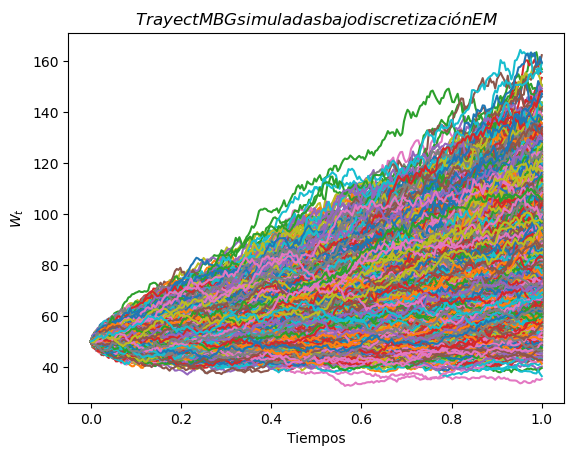

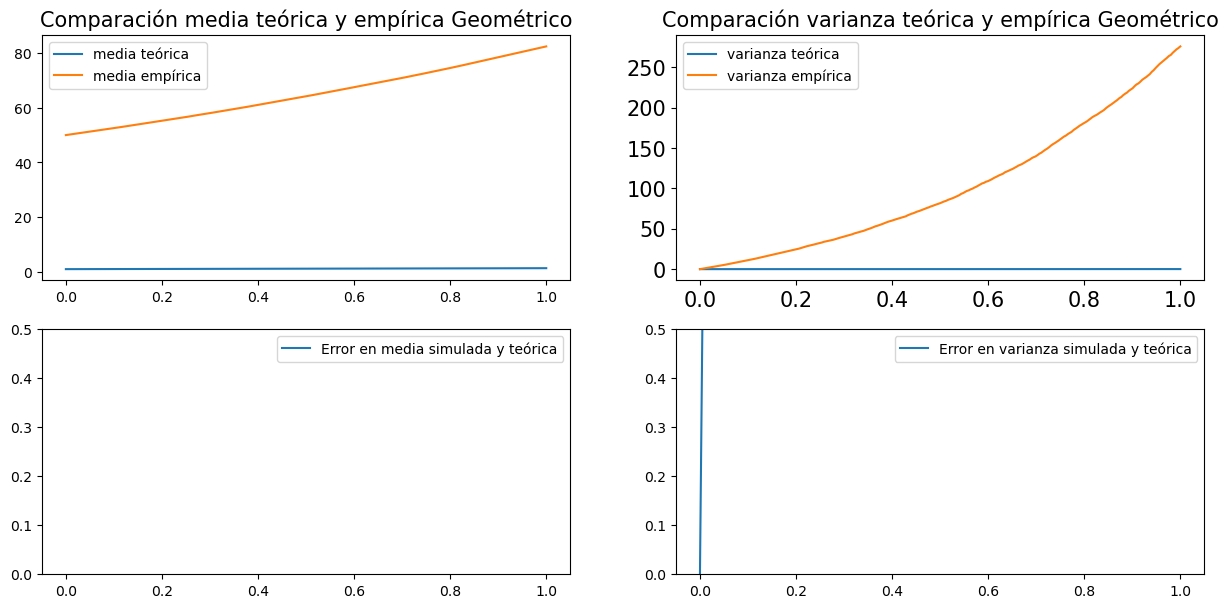

In [41]:
#Numeral 2
T=1
n=253
d=10000
time=np.linspace(0,T,n)
dt=T/(n-1)
dB=bm.get_dB(n,dt)
G_0=50*np.ones(d)

mu=0.3
sigma=0.2

def EM_geom_brown(G_0:np.array,mu:float,sigma:float,n:int,d:int,dt:float =1):
    """ 
    Generar matriz (dxn) con d trayectorias de movimientos brownianos geométricos de n observaciones a partir de 
    discretización de Euler Maruyama.
    Recibe:
    G_0: condiciones iniciales
    n: número de observaciones por trayectoria.
    d: número de trayectorias.
    dt (opcional): diferencial de tiempo.
    Retorna:
    Matriz de movimientos brownianos geométricos"""
    G_0=np.array(G_0)
    if G_0.ndim!=1 or len(G_0)!=d:
        raise Exception("Dimensiones de condiciones iniciales equivocadas")
    print(G_0.shape)
    G=np.zeros((d,n))
    G[:,0]=G_0
    B=bm.get_B_matrix(n,d,dt)
    dB=np.diff(B,axis=1)
    for i in range(1,n):
        G[:,i]=(1+mu*dt)*G[:,i-1]+sigma*G[:,i-1]*dB[:,i-1]
    return G

G=EM_geom_brown(G_0,0.5,0.2,n,d,dt=dt)


fig, ax = plt.subplots()
ax.plot(time,G.T)
ax.set_title("$Trayect MBG simuladas bajo discretización EM$")
ax.set_xlabel("Tiempos")
ax.set_ylabel("$W_t$")
plt.show() 

mu_teor_t,cov_teor=bm.geometric_theoret_mu_cov(time,alpha=mu-sigma**2/2,lamda=sigma)
mu_hat_t,cov_hat=bm.empiric_mu_cov(G)

var_hat_t=np.diag(cov_hat)
var_teor_t=np.diag(cov_teor)

mu_error=bm.error(mu_hat_t,mu_teor_t)
var_error=bm.error(var_hat_t,var_teor_t)

plotear("Geométrico",time, mu_teor_t,mu_hat_t,var_teor_t,var_hat_t,mu_error,var_error,lim_err=[0,0.5])


In [58]:
np.random.seed(0)
df = pd.DataFrame(10 + np.random.randn(10).cumsum(), columns=['price'])
df.price-df.price.shift(1)

0         NaN
1    0.400157
2    0.978738
3    2.240893
4    1.867558
5   -0.977278
6    0.950088
7   -0.151357
8   -0.103219
9    0.410599
Name: price, dtype: float64

In [64]:
yf.pdr_override()
inicio=datetime(2020,1,1)
fin=datetime(2022,11,12)
data=pdr.get_data_yahoo("ACN",inicio,fin)
data.drop(["Open","Adj Close","Volume"],axis=1,inplace=True)
data


[*********************100%%**********************]  1 of 1 completed


,High,Low,Close
Date,,,
2020-01-02,211.919998,208.809998,210.149994
2020-01-03,210.630005,207.000000,209.800003
2020-01-06,208.789993,206.809998,208.429993
2020-01-07,206.259995,203.190002,203.929993
2020-01-08,205.449997,203.529999,204.330002
...,...,...,...
2022-11-07,269.109985,261.369995,269.070007
2022-11-08,274.899994,266.119995,269.029999
2022-11-09,269.190002,265.369995,266.440002


<Axes: xlabel='Date'>

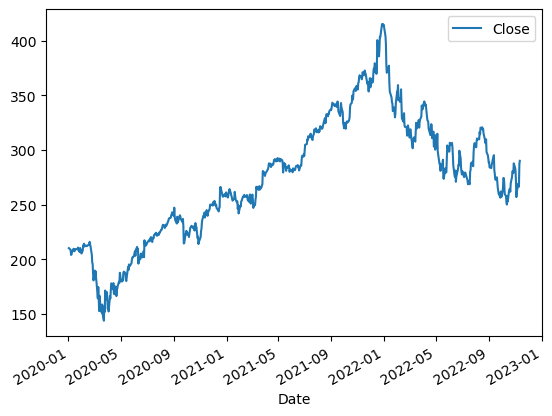

In [65]:
data[["Close"]].plot()

In [81]:
data["Gross_ret"]=data["Close"].pct_change()
data["Log_ret"]=np.log1p(data["Gross_ret"])

<Axes: xlabel='Date'>

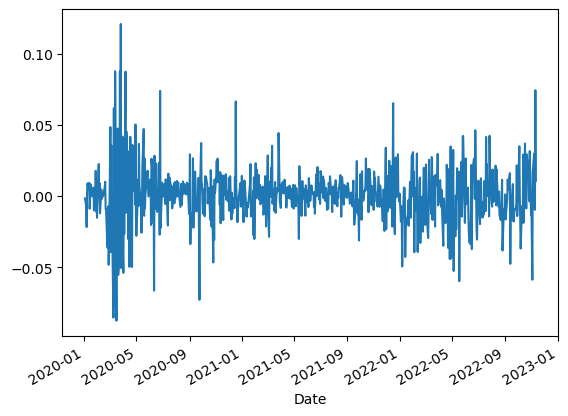

In [82]:
data["Log_ret"].plot()

In [63]:
jarque_bera(data["Log_ret"][1:])

SignificanceResult(statistic=590.2977840863342, pvalue=6.583621363006747e-129)

In [ ]:
np.log1p

In [17]:
a=np.array([[2,3]])
a.ndim

2